<a href="https://colab.research.google.com/github/victtorrria/Traiding/blob/main/multy_asset_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import yfinance as yf
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [32]:
symbols = ['GNRC', 'DXCM', 'AMD', 'NFLX', 'TGT', 'AES']
df = yf.download(symbols, start='2018-01-01', end='2021-09-01')['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [33]:
df[:3]

,AES,AMD,DXCM,GNRC,NFLX,TGT
Date,,,,,,
2018-01-02,9.545205,10.98,57.990002,48.029999,201.070007,61.324650
2018-01-03,9.536433,11.55,58.080002,49.730000,205.050003,60.907532
2018-01-04,9.501339,12.12,52.250000,50.070000,205.630005,59.710602


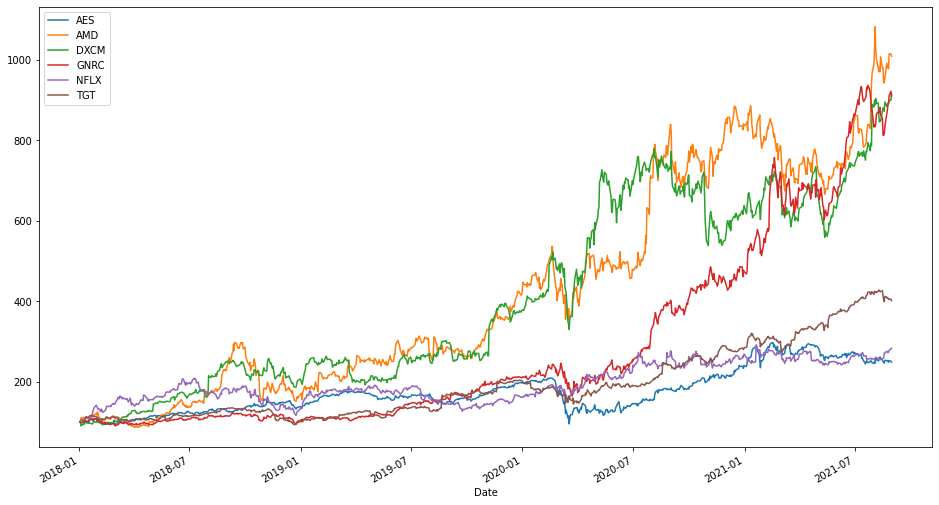

In [34]:
(df / df.iloc[0] * 100).plot(figsize=(16,9))

In [35]:
returns = np.log( df / df.shift(1))
mean_return = returns.mean() * 252
mean_return

AES     0.248872
AMD     0.631621
DXCM    0.604448
GNRC    0.603505
NFLX    0.284405
TGT     0.379835
dtype: float64

# **Covarience**

In [36]:
returns.cov() * 252

,AES,AMD,DXCM,GNRC,NFLX,TGT
AES,0.144203,0.055266,0.043813,0.065557,0.032133,0.038466
AMD,0.055266,0.312655,0.093411,0.086732,0.102382,0.057842
DXCM,0.043813,0.093411,0.235140,0.060096,0.064031,0.030436
GNRC,0.065557,0.086732,0.060096,0.158348,0.051556,0.041750
NFLX,0.032133,0.102382,0.064031,0.051556,0.169375,0.031428
TGT,0.038466,0.057842,0.030436,0.041750,0.031428,0.097915


# **Correlation**

In [37]:
corr_df = returns.corr()
corr_df

,AES,AMD,DXCM,GNRC,NFLX,TGT
AES,1.000000,0.260278,0.237933,0.433836,0.205607,0.323713
AMD,0.260278,1.000000,0.344512,0.389800,0.444906,0.330590
DXCM,0.237933,0.344512,1.000000,0.311443,0.320851,0.200588
GNRC,0.433836,0.389800,0.311443,1.000000,0.314808,0.335296
NFLX,0.205607,0.444906,0.320851,0.314808,1.000000,0.244043
TGT,0.323713,0.330590,0.200588,0.335296,0.244043,1.000000


# **Plot correlation matrix**

<Figure size 432x288 with 0 Axes>

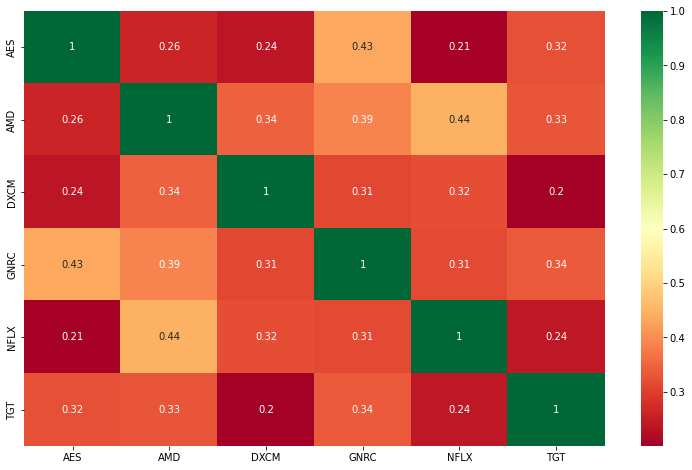

<Figure size 432x288 with 0 Axes>

In [38]:
#ყველა
plt.figure(figsize=(13,8))
seaborn.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.figure()

# **Generate random weights (sum=1)**
სხვადასხვა წილებს ვანიჭებთ თითო კომპანიას.წონებს ვუცვლით და ვირჩევთ საუკეთესო შარფ რეიშოს

In [39]:
weights = np.random.random(len(symbols))
weights = weights / np.sum(weights)
print(weights)
print('')
print(sum(weights))

[0.13629998 0.1173292  0.2533382  0.15380644 0.21411069 0.12511549]

0.9999999999999999


# **Calculate return for portfolio**

In [40]:
np.sum(weights * returns.mean()) * 252

0.46239891650824205

# **Calculate multyasset portfolio risk (standard deviation)**

In [41]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights )))

0.28568930659223546

# **Analyzing returns and risks of 10,000 combinations**

In [42]:
p_ret = []
p_vol = []
p_SR = []
#sharp ratio
p_wt = []

for x in range(10000):
  # Generate random weights
  p_weights = np.random.random(len(symbols))
  p_weights = p_weights / np.sum(p_weights)

  #add weights uding those random weights
  ret_1 = np.sum(p_weights * returns.mean()) * 252
  p_ret.append(ret_1)

  #add volatility or standart deviation to list
  vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
  p_vol.append(vol_1)

  #get sharp ratio
  SR_1 = ret_1 / vol_1
  p_SR.append(SR_1)

  #store weights for each portfolio
  p_wt.append(p_weights)

#convert to Numpy array
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)



# **Plot the efficient frontier**

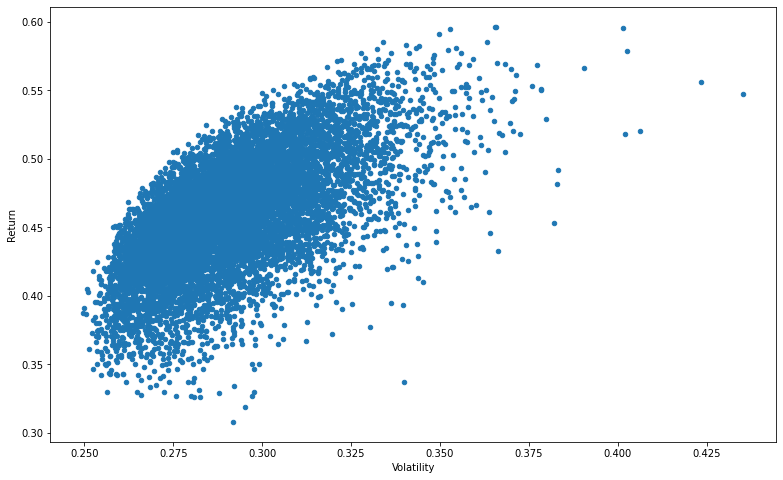

In [44]:
#create dataframe with returnss and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

#volability - riski, return - ukugeba

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(13,8))

# **Find max sharp ratio**

In [48]:
#return the index of the largest sharp ratio
SR_idx = np.argmax(p_SR)

#find the ideal portfolio weights at that index
i = 0
while i < len(symbols):
  print('Stock : %s : %2.2f' % (symbols[i], (p_wt[SR_idx][i] * 100)))
  i += 1

#find returns of the portfolio
print ('\nReturn :', p_ret[SR_idx])

print('Volatility :', p_vol[SR_idx])

print('Sharp Ratio :', p_SR[SR_idx])

Stock : GNRC : 0.44
Stock : DXCM : 12.04
Stock : AMD : 18.38
Stock : NFLX : 34.38
Stock : TGT : 3.01
Stock : AES : 31.75

Return : 0.5248804627447352
Volatility : 0.284218488575779
Sharp Ratio : 1.846749890814335
